# Stock market analysis

This notebook is an introduction to application of python data science tools in analysing the stock market.

Methodology (Workflow of this analysis)
Stock information of 4 tech stocks (AAPL, AMZN, GOOG, MSFT )was fetched via yfinance module. Time series stock prices of 4 tech stocks were visualized. Correlation analysis shows that all 4 stock prices are correlated. mean stock price and standard deviation were used to calculate the risk metric. Finally bootstrap method and Monte Carlo  Simulation was applied to calculate daily value at risk

It aims to provide the code to return:
1. The change of price of a stock over time
2. The daily return of a stock on average
3. The moving average of a stock over time
4. Correlation matrix between various tech stock closing prices
5. Correlation matrix between various tech stock daily returns
6. Average Value at risk at certain confidence level 
7. Insights on future stock behaviour


## 1. Import modules

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from __future__ import division
import os

%matplotlib inline

## 2. Fetch stock data

In [56]:
tech_stocks = ['AAPL','AMZN','GOOG','MSFT',]
end_date = datetime.now()
start_date = datetime(end_date.year-1, end_date.month, end_date.day)

end_date = end_date.strftime('%Y-%m-%d')
start_date = start_date.strftime('%Y-%m-%d')

df_list = []
for stock in tech_stocks:
    name = 'df-{stock}'
    df = yf.download(stock, start=start_date, end=end_date)
    df_list.append(df)

AAPL = df_list[0]
AMZN = df_list[1]
GOOG = df_list[2]
MSFT = df_list[3]
#for stock in tech_stocks:
#    df = pdr.data.DataReader(stock, 'yahoo',start = start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 3. Inspect data and EDA

In [59]:
i= 0
for df in df_list:
    print('******',tech_stocks[i],'******')
    print(df.head())
    i +=1 

****** AAPL ******
                  Open        High         Low       Close   Adj Close    Volume
Date                                                                            
2021-12-27  177.089996  180.419998  177.070007  180.330002  179.289459  74919600
2021-12-28  180.160004  181.330002  178.529999  179.289993  178.255432  79144300
2021-12-29  179.330002  180.630005  178.139999  179.380005  178.344940  62348900
2021-12-30  179.470001  180.570007  178.089996  178.199997  177.171722  59773000
2021-12-31  178.089996  179.229996  177.259995  177.570007  176.545380  64062300
****** AMZN ******
                  Open        High         Low       Close   Adj Close    Volume
Date                                                                            
2021-12-27  171.037003  172.942993  169.215500  169.669495  169.669495  58688000
2021-12-28  170.182495  172.175995  169.135498  170.660995  170.660995  54638000
2021-12-29  170.839996  171.212006  168.600494  169.201004  169.201004 

In [61]:
i=0
for df in df_list:
    print('******',tech_stocks[i],'******')
    print(df.describe())
    i += 1

****** AAPL ******
             Open        High         Low       Close   Adj Close        Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   155.683214  157.790357  153.590714  155.725238  155.253407  8.769142e+07
std     13.052399   12.885175   13.142575   13.031971   12.816206  2.374461e+07
min    130.070007  132.389999  129.039993  130.059998  129.664490  3.519590e+07
25%    145.229996  147.375004  143.084999  145.417496  145.020161  7.152005e+07
50%    154.805000  156.915001  152.804993  154.629997  154.249115  8.342450e+07
75%    167.332504  169.107498  165.154995  166.454998  165.705360  9.692052e+07
max    182.630005  182.940002  179.119995  182.009995  180.959732  1.826020e+08
****** AMZN ******
             Open        High         Low       Close   Adj Close        Volume
count  252.000000  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   127.868228  129.970288  125.455457  127.629589  127.629589  7.578321e+07
st

In [62]:
i=0
for df in df_list:
    print('******',tech_stocks[i],'******')
    print(df.info())
    i += 1

****** AAPL ******
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-12-27 to 2022-12-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB
None
****** AMZN ******
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-12-27 to 2022-12-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), 

Text(0.5, 1.0, 'MSFT closing price')

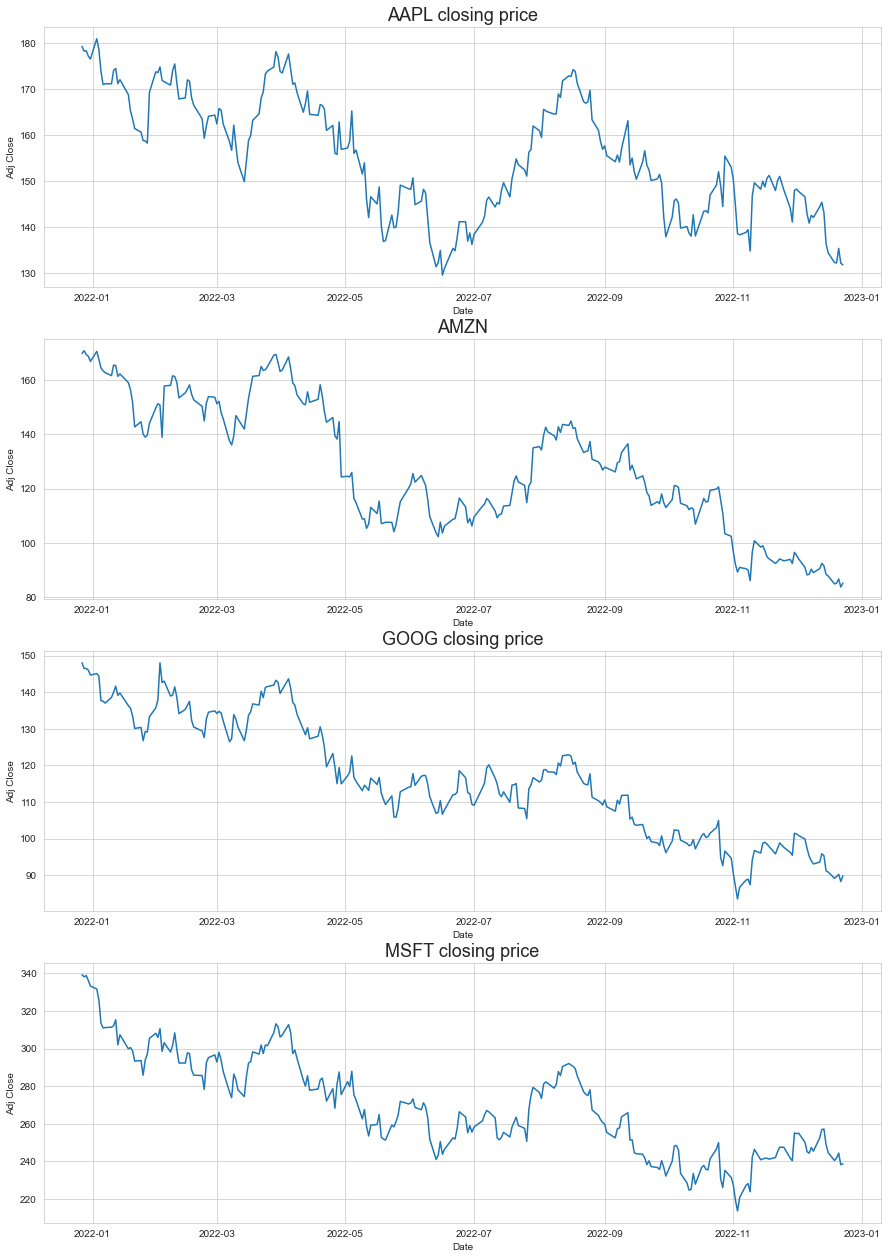

In [101]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,22))
plot_0 = sns.lineplot(ax=axes[0], x='Date', y='Adj Close', data = df_list[0])
plot_0.set_title('AAPL closing price', fontsize = 18)
plot_1 = sns.lineplot(ax=axes[1], x='Date', y='Adj Close', data = df_list[1])
plot_1.set_title('AMZN', fontsize = 18)
plot_2 = sns.lineplot(ax=axes[2], x='Date', y='Adj Close', data = df_list[2])
plot_2.set_title('GOOG closing price', fontsize = 18)
plot_3 = sns.lineplot(ax=axes[3], x='Date', y='Adj Close', data = df_list[3])
plot_3.set_title('MSFT closing price', fontsize = 18)

Text(0.5, 1.0, 'MSFT  Volume')

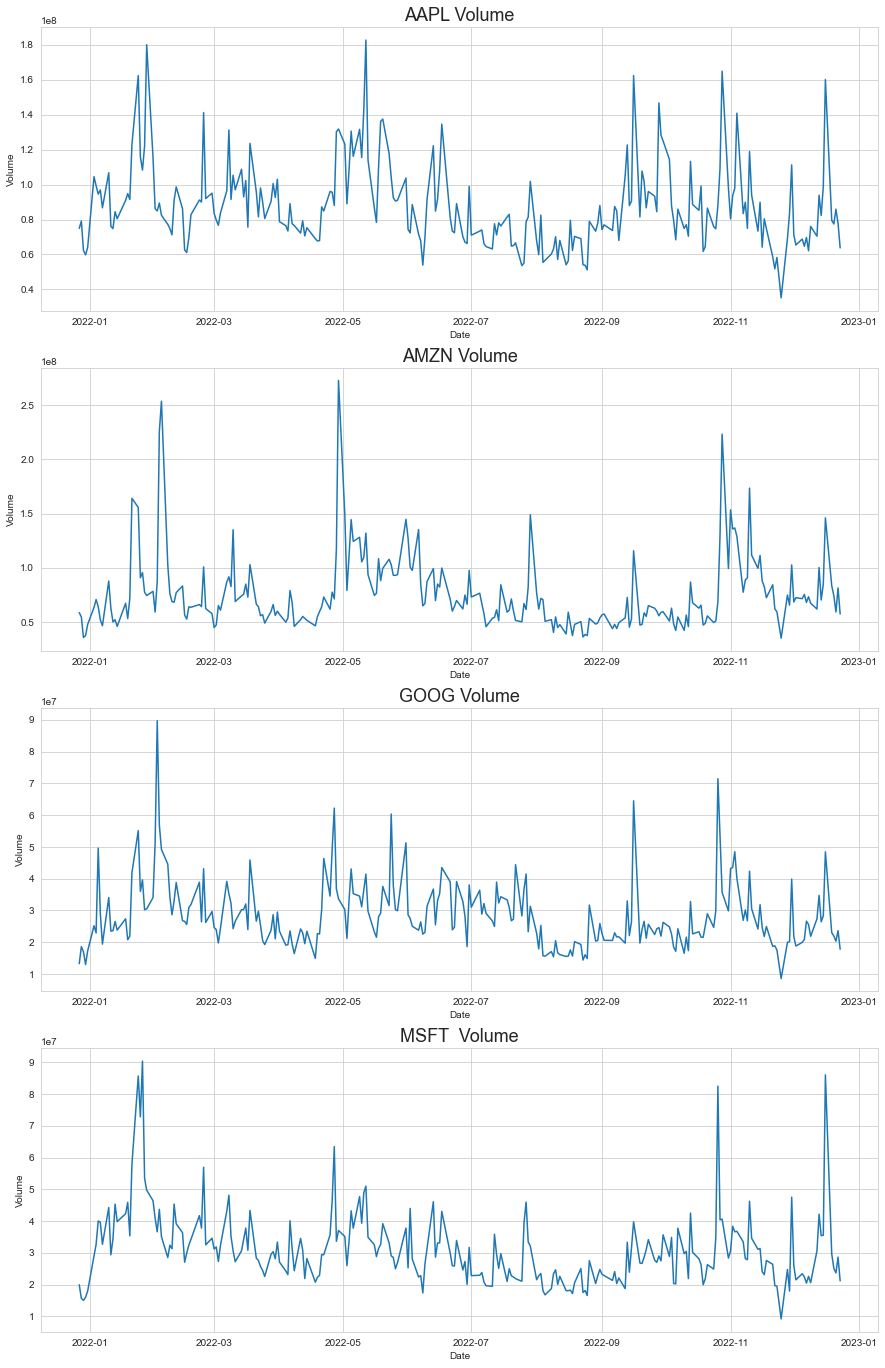

In [132]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,24))
plot_0 = sns.lineplot(ax=axes[0], x='Date', y='Volume', data = df_list[0])
plot_0.set_title('AAPL Volume', fontsize = 18)
plot_1 = sns.lineplot(ax=axes[1], x='Date', y='Volume', data = df_list[1])
plot_1.set_title('AMZN Volume', fontsize = 18)
plot_2 = sns.lineplot(ax=axes[2], x='Date', y='Volume', data = df_list[2])
plot_2.set_title('GOOG Volume', fontsize = 18)
plot_3 = sns.lineplot(ax=axes[3], x='Date', y='Volume', data = df_list[3])
plot_3.set_title('MSFT  Volume', fontsize = 18)

In [116]:
ma_day = [10,20,50]
for df in df_list:
    for ma in ma_day:
        column_name = "MA for %s days" %(str(ma))
        df[column_name]=df['Adj Close'].rolling(ma, min_periods= 1).mean()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2021-12-27,177.089996,180.419998,177.070007,180.330002,179.289459,74919600,179.289459,179.289459,179.289459
2021-12-28,180.160004,181.330002,178.529999,179.289993,178.255432,79144300,178.772446,178.772446,178.772446
2021-12-29,179.330002,180.630005,178.139999,179.380005,178.344940,62348900,178.629944,178.629944,178.629944
2021-12-30,179.470001,180.570007,178.089996,178.199997,177.171722,59773000,178.265388,178.265388,178.265388
2021-12-31,178.089996,179.229996,177.259995,177.570007,176.545380,64062300,177.921387,177.921387,177.921387


<AxesSubplot:xlabel='Date'>

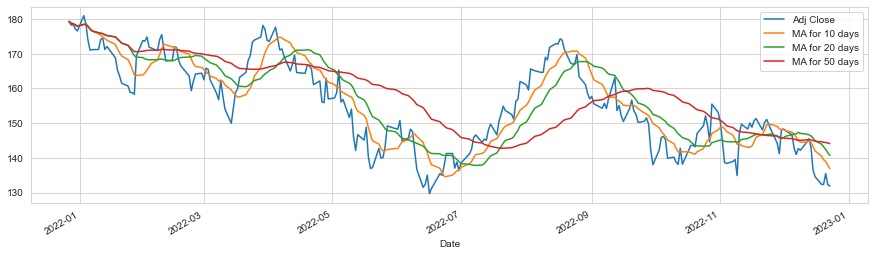

In [133]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,4))

<AxesSubplot:xlabel='Date'>

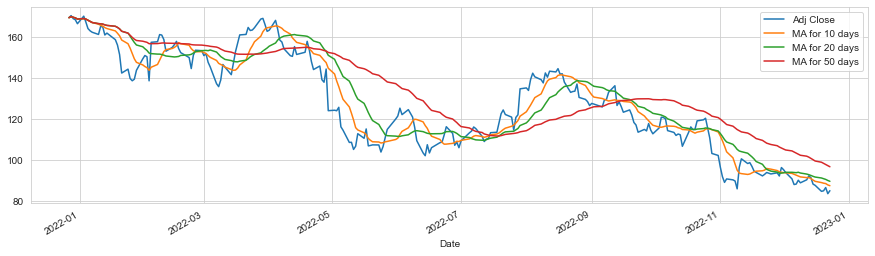

In [134]:
AMZN[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,4))

<AxesSubplot:xlabel='Date'>

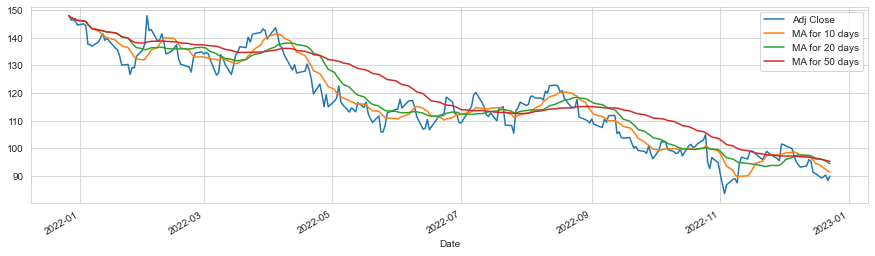

In [135]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,4))

<AxesSubplot:xlabel='Date'>

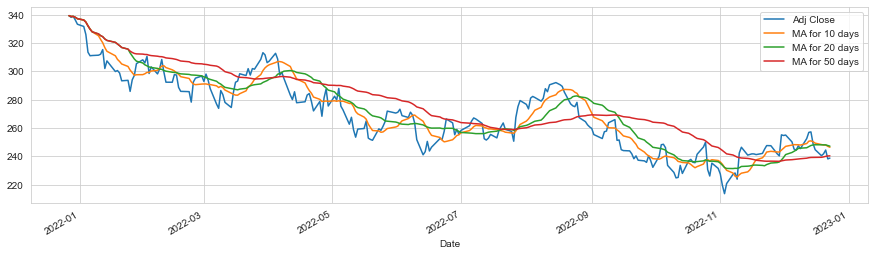

In [136]:
MSFT[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(15,4))

## 4. Daily return analysis

In [124]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

Text(0.5, 1.0, 'AAPL Daily return')

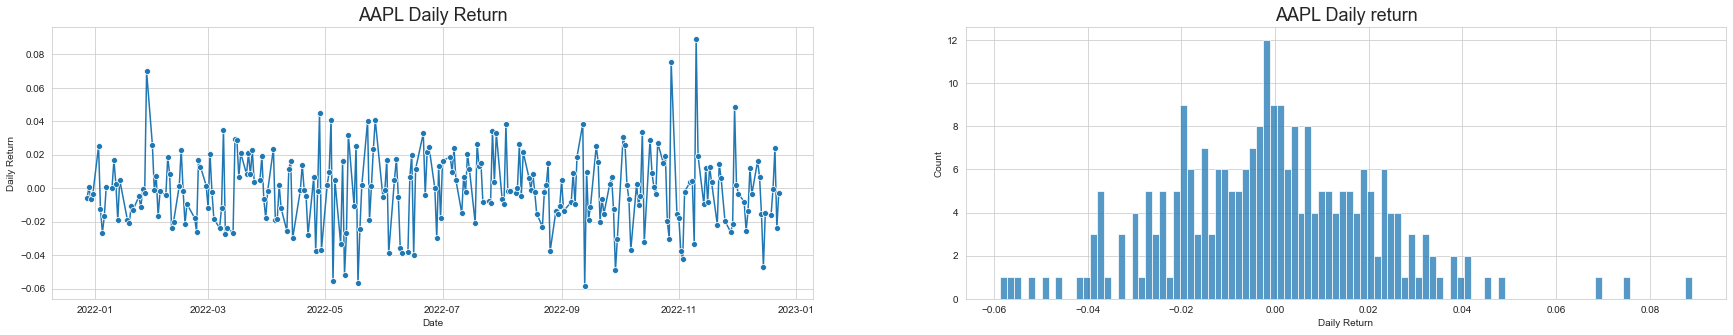

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,5))
plot_0 = sns.lineplot(ax=axes[0], x='Date', y='Daily Return', data = AAPL, marker = 'o')
plot_0.set_title('AAPL Daily Return', fontsize = 18)
plot_1 = sns.histplot(data = AAPL['Daily Return'].dropna(), bins=100)
plot_1.set_title('AAPL Daily return', fontsize = 18)

In [187]:
# analyize returns of all of the stocks
df_closing = pd.concat([df_list[0]['Adj Close'], df_list[1]['Adj Close'], df_list[2]['Adj Close'], df_list[3]['Adj Close']],
                       axis=1)
df_closing.columns = tech_stocks
df_closing.reset_index(inplace=True) 
df_closing.columns
df_closing.head()

,Date,AAPL,AMZN,GOOG,MSFT
0,2021-12-27,179.289459,169.669495,148.063995,339.270996
1,2021-12-28,178.255432,170.660995,146.447998,338.082123
2,2021-12-29,178.344940,169.201004,146.504501,338.775665
3,2021-12-30,177.171722,168.644501,146.002502,336.170044
4,2021-12-31,176.545380,166.716995,144.679504,333.197906


In [208]:
df_rets = df_closing.copy()
df_rets = df_closing.iloc[:, 1:].pct_change()
df_rets

,AAPL,AMZN,GOOG,MSFT
0,NaN,NaN,NaN,NaN
1,-0.005767,0.005844,-0.010914,-0.003504
2,0.000502,-0.008555,0.000386,0.002051
3,-0.006578,-0.003289,-0.003427,-0.007691
4,-0.003535,-0.011429,-0.009061,-0.008841
...,...,...,...,...
247,-0.015910,-0.033462,-0.018820,-0.017328
248,-0.000529,0.003180,0.005384,0.005614
249,0.023809,0.018547,0.006917,0.010877
250,-0.023773,-0.034344,-0.022050,-0.025529


In [209]:
df_rets = pd.concat([df_closing.iloc[:,:1], df_rets], axis=1)

In [210]:
df_rets

,Date,AAPL,AMZN,GOOG,MSFT
0,2021-12-27,NaN,NaN,NaN,NaN
1,2021-12-28,-0.005767,0.005844,-0.010914,-0.003504
2,2021-12-29,0.000502,-0.008555,0.000386,0.002051
3,2021-12-30,-0.006578,-0.003289,-0.003427,-0.007691
4,2021-12-31,-0.003535,-0.011429,-0.009061,-0.008841
...,...,...,...,...,...
247,2022-12-19,-0.015910,-0.033462,-0.018820,-0.017328
248,2022-12-20,-0.000529,0.003180,0.005384,0.005614
249,2022-12-21,0.023809,0.018547,0.006917,0.010877
250,2022-12-22,-0.023773,-0.034344,-0.022050,-0.025529


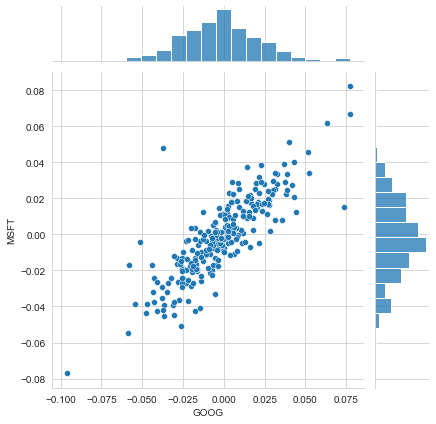

In [214]:
sns.jointplot(x='GOOG',y='MSFT',data = df_rets,kind='scatter')

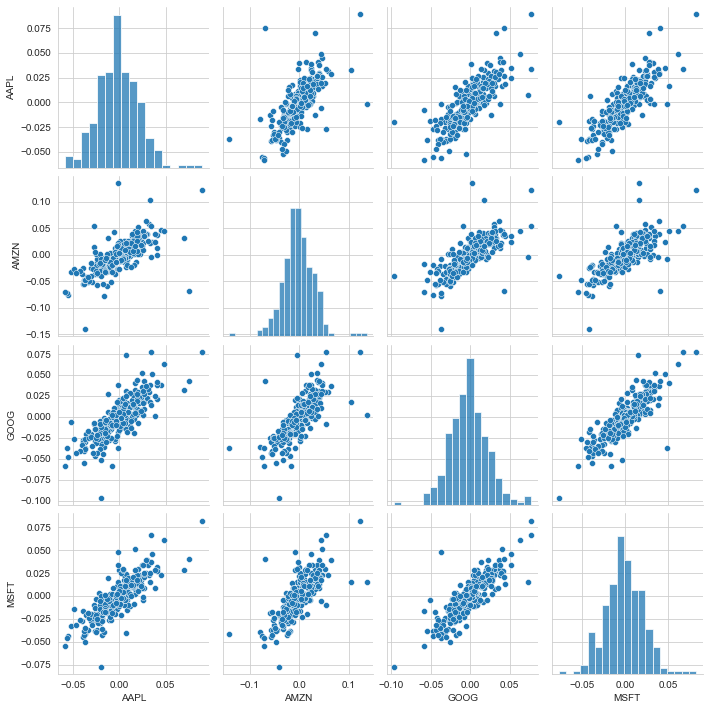

In [216]:
sns.pairplot(data=df_rets.dropna())

<AxesSubplot:>

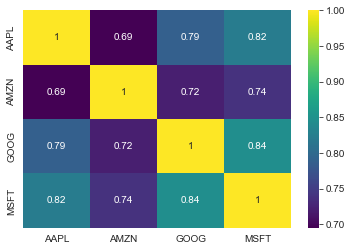

In [220]:
corr_map = df_rets.corr()
sns.heatmap(data = corr_map, annot=True, cmap = 'viridis##')

## 5. Risk Analysis

In [224]:
rets = df_rets.copy()
rets.dropna(inplace=True)

In [232]:
rets

,Date,AAPL,AMZN,GOOG,MSFT
1,2021-12-28,-0.005767,0.005844,-0.010914,-0.003504
2,2021-12-29,0.000502,-0.008555,0.000386,0.002051
3,2021-12-30,-0.006578,-0.003289,-0.003427,-0.007691
4,2021-12-31,-0.003535,-0.011429,-0.009061,-0.008841
5,2022-01-03,0.025004,0.022118,0.002730,-0.004668
...,...,...,...,...,...
247,2022-12-19,-0.015910,-0.033462,-0.018820,-0.017328
248,2022-12-20,-0.000529,0.003180,0.005384,0.005614
249,2022-12-21,0.023809,0.018547,0.006917,0.010877
250,2022-12-22,-0.023773,-0.034344,-0.022050,-0.025529


In [248]:
x = rets.iloc[:,1:].mean()
x

AAPL   -0.000976
AMZN   -0.002246
GOOG   -0.001695
MSFT   -0.001155
dtype: float64

In [249]:
y = rets.iloc[:, 1:].std()
y

AAPL    0.022321
AMZN    0.031451
GOOG    0.024310
MSFT    0.022169
dtype: float64

Text(0, 0.5, 'Risk')

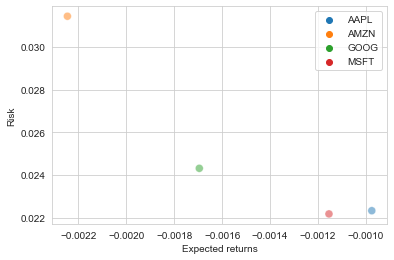

In [256]:
area = np.pi*20
# area of the datapoints

sns.scatterplot(x=x, y=y, alpha=0.5, s=area, hue = ['AAPL','AMZN','GOOG','MSFT'])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# https://matplotlib.org/stable/tutorials/text/annotations.html#basic-annotation


## 6. Value at risk

### 6.1 Bootstrap method

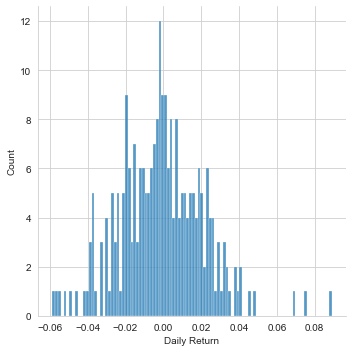

In [257]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100)

In [259]:
rets['AAPL'].quantile(0.05)

-0.03731651824364818

at 95% confidence, the worst daily loss will noy exceed 3.73%

### 6.2 Monte carlo method

In [261]:
days = 365
dt= 1/days
mu=rets.iloc[:,1:].mean()['GOOG']
sigma = rets.iloc[:,1:].std()['GOOG']

In [263]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # epsilon is implemented as a normal dist defined by sigma(std)*sqrt(time)
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo analysis 2022-12-27 google stock price')

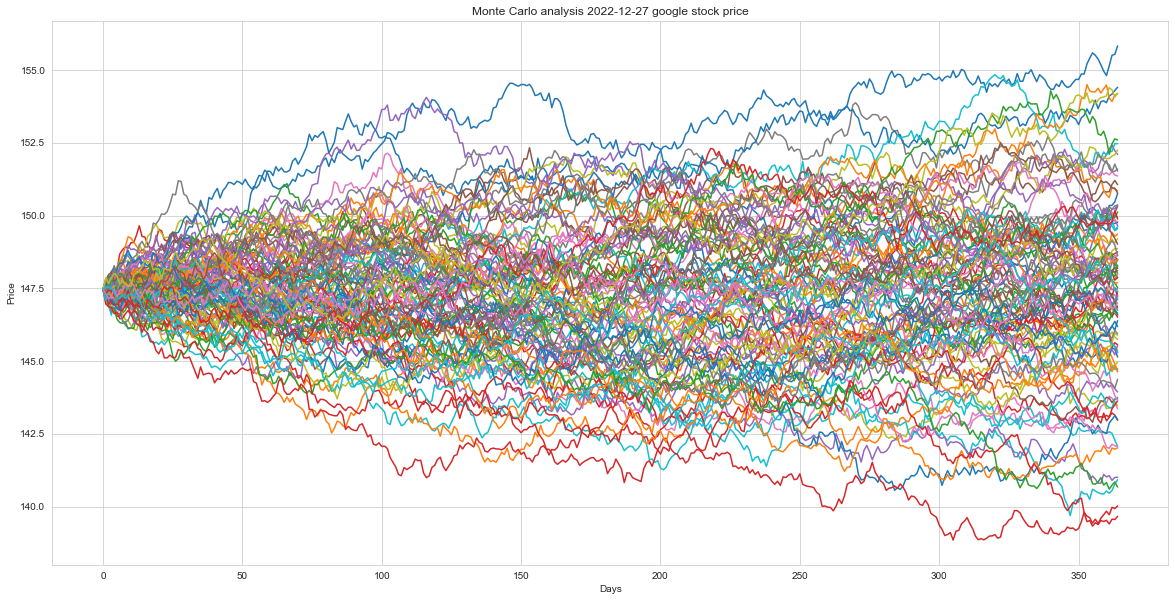

In [292]:
start_price =  147.463501
plt.rcParams["figure.figsize"] = (20,10)
for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis 2022-12-27 google stock price')

In [281]:
# create a histogram with 10000 runs
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu,sigma)[days-1]
    # fpr each simulation, get the price at the last day 

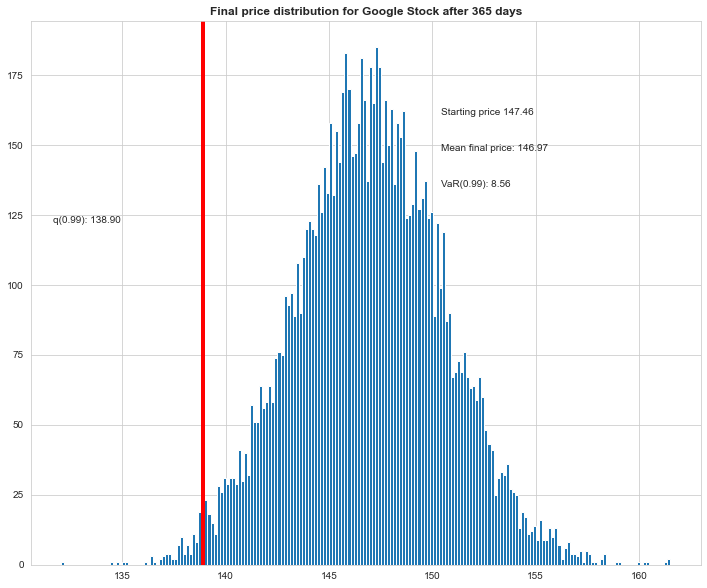

In [291]:
plt.rcParams["figure.figsize"] = (12,10)
q = np.percentile(simulations, 1)
# 1% empirical quantile; 99% confidence level

plt.hist(simulations, bins=200) 
plt.figtext(0.6,0.75, 'Starting price {:.2f}'.format(start_price))
plt.figtext(0.6, 0.7, "Mean final price: {:.2f}".format(simulations.mean()))
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.65, "VaR(0.99): {:.2f}".format(start_price - q,))
# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): {:.2f}".format(q))

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')


plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

q(0.99) means 99% of the time, value at risk is 8.56